Use the following to explore the FFT of a simple function:

$f\left(t\right)=a\:\sin\left(f_12\pi t\right)+b\:\sin\left(f_22\pi t\right)+c\:\cos\left(f_32\pi t\right)+d\:\cos\left(f_42\pi t\right)+e $

Fill in the blanks and try different frequencies ($f_1, f_2, f_3, f_4$) and combinations of sine and cosine functions to create f. 

Start with this preamble to load necessary modules

In [9]:
from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi,e,arange, real, imag, sign
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout, stem
from scipy.fftpack import fft
from pylab import xlim

Now create a time array given a sample rate and number of observations. This is typical specification for a time series.

In [10]:
# time dimension

Fs = 500 # Hz  sampling frequency: samples per second
nt  = 2000 #     number of samples in record
T =  1/Fs  # Time period of record
dT = T/nt # sec   time between samples

t=arange(0, T, dT)  #  time array in seconds using arange(start,stop,step)
            #   note that arange actually stops *before* stop time which
            #   is what we want (in a periodic function t=0 and t=T are the same)

print(len(t))
print(dT)
print(t[0],t[-1],dT)

2001
1e-06
0.0 0.002 1e-06


To test this, print out the first and last elements of t array and dt.

Now construct the frequencies we will get from DFT

In [11]:
# frequency dimension

freqf = 1000 # Hz   fundamental frequency (lowest frequency)
nfmax = int(nt/2) # number of frequencies resolved by FFT

freqmax = freqf*nfmax # Max frequency (Nyquist)

freq = arange(0,freqmax,freqf) # frequency array using arange(start,stop,step)
# Note:
#     include freq=0 (constant term), so freq[0]=0
#     end one term before the  Nyquist (max) frequency, so freq[-1]=freqmax-freqf
print(freq[0],freq[-1],freqf)
print(len(freq))
print('Fundamental period and Nyquist Freq',T, freqmax)

0 999000 1000
1000
Fundamental period and Nyquist Freq 0.002 1000000


Select some frequencies and coefficiencts to build the function above. Start with low frequencies, that are small integer multiples of the fundamental (lowest) frequency. Then then try non-integer multiples. What happens? Try very high frequencies, close to the nyquist cutoff. What happens?

In [12]:
# select four frequencies 
f1=10*freqf
f2=20*freqf
f3=30*freqf
f4=40*freqf

print('Frequencies selected:', f1, f2, f3, f4)

# Create f(t) = A sin(f1 2 pi t) + B sin(f2 2 pi t)  + C cos(f3 2 pi t) + D cos(f4 2 pi t) + E% 
# Where A B C D E are integers between -10 and + 10
# Use your time array defined above so f is an array
# with values at each of these times.
# what is the equation for a sine or cos wave with frequency w1?
#    this is an array over all values of time array t, not a "function"
#    sin and cos can opperate on an array so no loop needed
#    remember factor of 2pi
#    basically, just write it like math!

A = -2
B = 1
C = 3
D = 5
E = 8
f = [] 
for v in t:
    fv = A*sin(f1*2*pi*v)+B*sin(f2*2*pi*v)+C*cos(f3*2*pi*v)+D*cos(f4*2*pi*v)+E
    f.append(fv)


print(len(f))



Frequencies selected: 10000 20000 30000 40000
2001


The rest of the code needs no editing, just read to understand how it works.

This block takes the FFT, constructs the a and b coefficients and the power spectrum

In [13]:
# take FFT of this function
F = fft(f)

# get the coeffs
a = 2*real(F[:nfmax])/nt # form the a coefficients
a[0] = a[0]/2

b = -2*imag(F[:nfmax])/nt # form the b coefficients

p = sqrt(a**2 + b**2) # form power spectrum


This block makes some plots

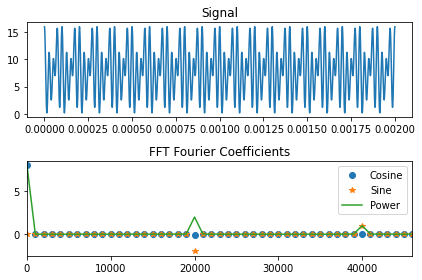

In [14]:
## make some plots

figure(1)

subplot(2,1,1)
plot(t,f)
title('Signal')

subplot(2,1,2)
plot(freq, a, 'o', label='Cosine')
plot(freq, b, '*', label='Sine')
plot(freq,p,'-', label='Power')
legend()

title('FFT Fourier Coefficients')
xmax = max([f1, f2, f3, f4])*1.15 # find max value and pad a bit (15%)
xlim(0, xmax)

tight_layout() # prevent squished plot (matplotlib kludge)
